In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy.random as rnd
from PIL import Image

from antenna_utils import *
from plot_utils import *

# plt.rcParams['image.cmap'] = 'cubehelix'
plt.rcParams['image.cmap'] = 'afmhot'

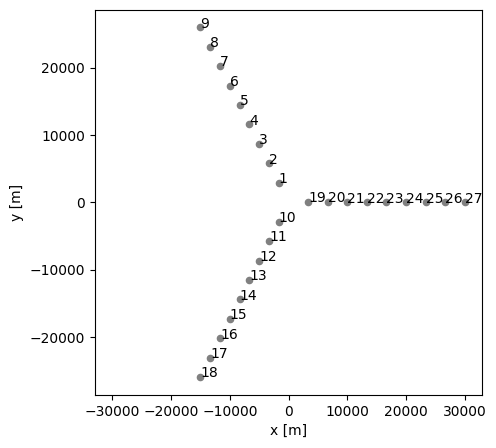

In [2]:
# Antenna parameters
x_lim = 30000
y_lim = 30000
n_antenna = 3*9
n_baselines = n_antenna*(n_antenna-1)
radius = 30000
alpha = 120
# arr = random_antenna_arr(n_antenna, x_lim, y_lim)
# arr = radial_antenna_arr(n_antenna, x_lim, y_lim,radius)
arr = y_antenna_arr(int(n_antenna/3), radius, alpha)
plot_antenna_arr(arr)

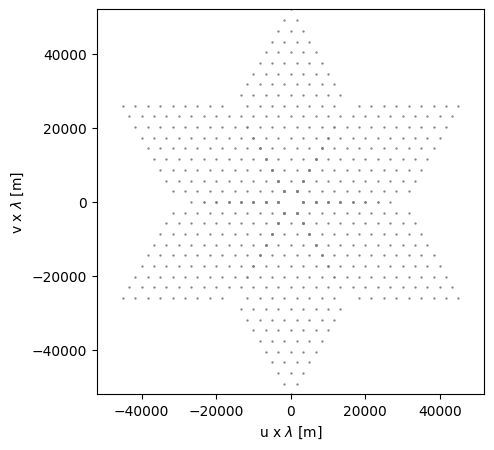

In [3]:
# Get baselines from array and plot
base_arr = get_baselines(arr)
plot_baselines(base_arr)

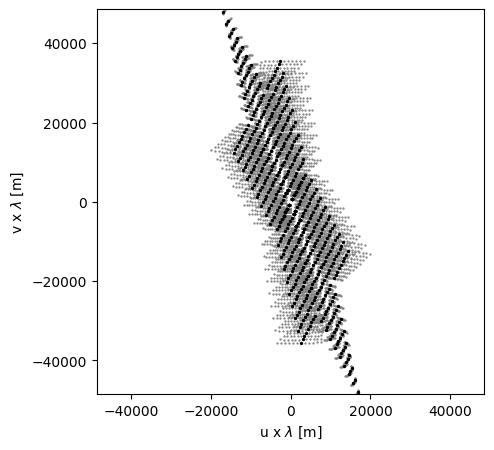

In [4]:
# Source tracking parameters
source_decl = 15/180*np.pi
array_lat = 19.1/180*np.pi
track_time = 1
delta_t = 5/60 # 300 segs
t_0 = 5

# Get time integrated uv plane
track = uv_time_int(base_arr, array_lat, source_decl, track_time, delta_t, t_0)
plot_baselines(track, n_baselines)

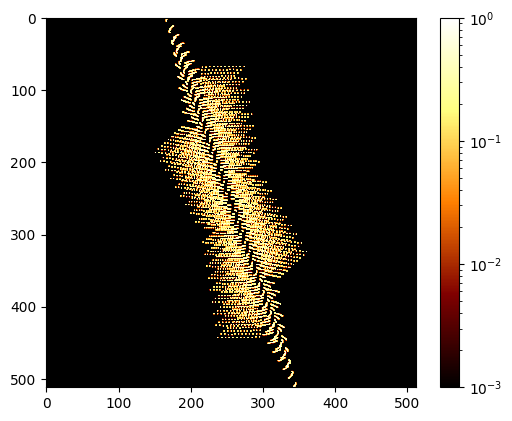

In [7]:
uv_dim = 512
uv_plane = get_uv_plane(track,uv_dim)
uv_plane_mask = get_uv_mask(uv_plane)
plot_sampled_sky(uv_plane_mask)

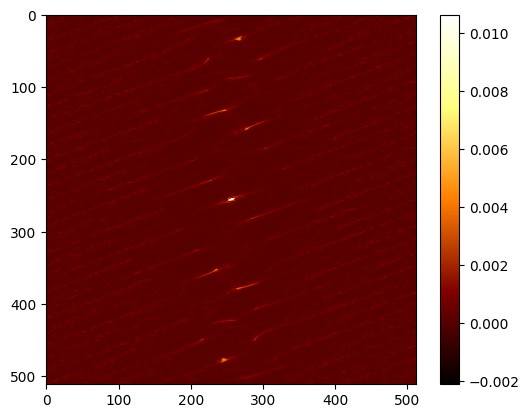

In [8]:
beam = get_beam(uv_plane_mask)
plot_beam(beam)

# Load Sky Model

In [9]:
sky_models_folder = '../sky_models/'
# sky_model = 'galaxy_lobes.png'
sky_model = 'crux.png'
sky_model_path = sky_models_folder + sky_model

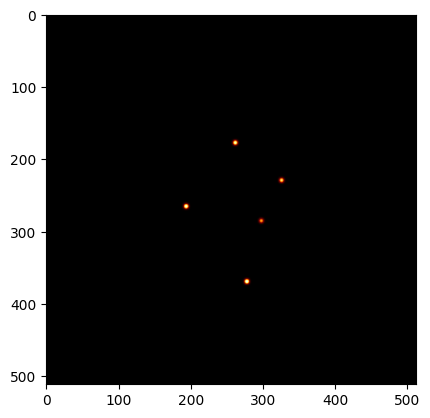

Image shape: (512, 512)
Image range: (0,250)


In [10]:
sky = load_sky_model(sky_model_path)
plot_sky(sky)

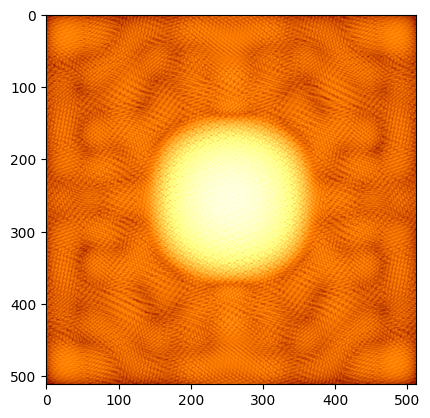

In [11]:
sky_uv = get_sky_uv(sky)
plot_sky_uv(sky_uv)

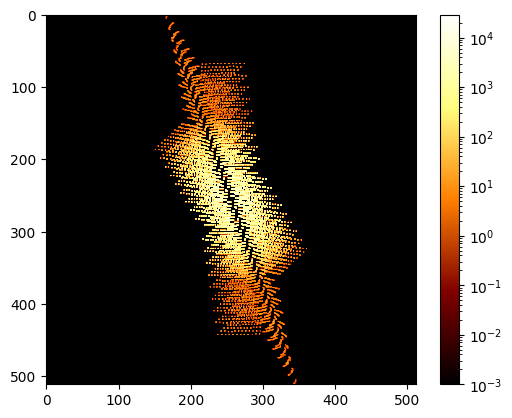

In [12]:

obs_uv = get_obs_uv(sky_uv,uv_plane_mask)
plot_sampled_sky(obs_uv)

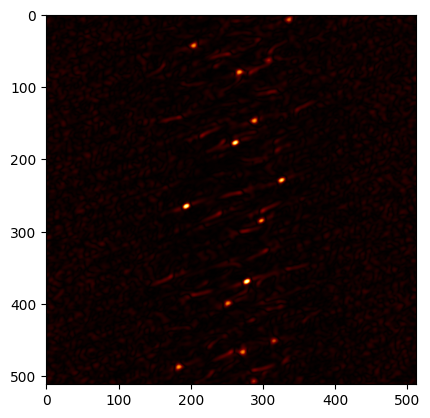

Image shape: (512, 512)
Image range: (0.0017300296221360513,34.73782881395887)


In [13]:
obs_sky = get_obs_sky(obs_uv)
plot_sky(np.abs(obs_sky))